In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/diabetes (1).csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


TASK A

In [7]:
# Set seed for reproducibility
np.random.seed(4848)

# Taking a random sample of 25 from total population
sample_25 = df.sample(n=25, random_state=4848)

In [8]:
# Calculate mean and max glucose values for the whole population
population_mean = df['Glucose'].mean()
population_max = df['Glucose'].max()

# Calculate mean and max glucose values for the sample of 25
sample_mean = sample_25['Glucose'].mean()
sample_max = sample_25['Glucose'].max()

# Print the results
print("Mean Glucose in Population:", population_mean)
print("Max Glucose in Population:", population_max)
print("Mean Glucose in Sample (25):", sample_mean)
print("Max Glucose in Sample (25):", sample_max)

summary = {
    'Dataset': ['Population', 'Sample (25)'],
    'Mean Glucose': [population_mean, sample_mean],
    'Max Glucose': [population_max, sample_max]
}
glucose_df = pd.DataFrame(summary)
glucose_df.set_index('Dataset', inplace=True)
print(glucose_df)


Mean Glucose in Population: 120.89453125
Max Glucose in Population: 199
Mean Glucose in Sample (25): 117.36
Max Glucose in Sample (25): 173
             Mean Glucose  Max Glucose
Dataset                               
Population     120.894531          199
Sample (25)    117.360000          173


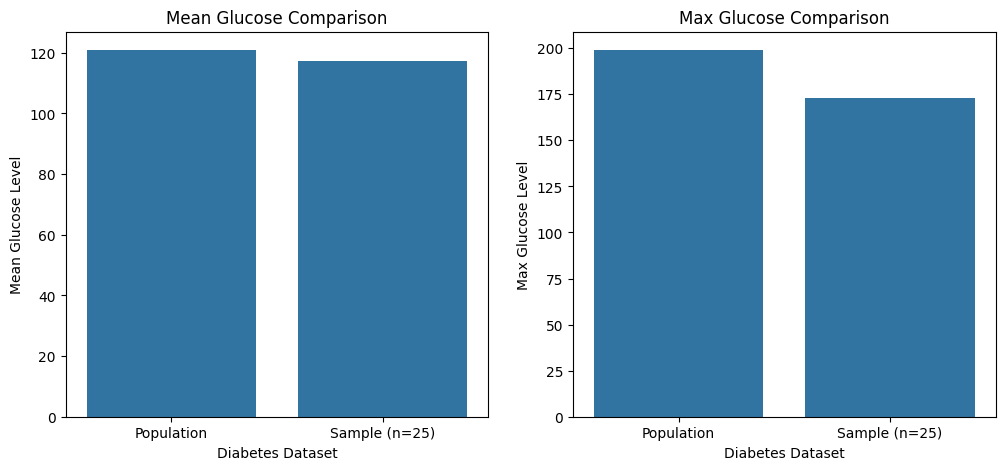

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample summary (replace with your actual values if different)
glucose_df = pd.DataFrame({
    'Dataset': ['Population', 'Sample (n=25)'],
    'Mean Glucose': [df['Glucose'].mean(), sample_25['Glucose'].mean()],
    'Max Glucose': [df['Glucose'].max(), sample_25['Glucose'].max()]
})

plt.figure(figsize=(12, 5))

# Bar chart for Mean Glucose
plt.subplot(1, 2, 1)
sns.barplot(data=glucose_df, x='Dataset', y='Mean Glucose')
plt.title('Mean Glucose Comparison')
plt.ylabel('Mean Glucose Level')
plt.xlabel('Diabetes Dataset')
plt.savefig("Mean_glucose_comparison.png")

# Bar chart for Max Glucose
plt.subplot(1, 2, 2)
sns.barplot(data=glucose_df, x='Dataset', y='Max Glucose',)
plt.title('Max Glucose Comparison')
plt.ylabel('Max Glucose Level')
plt.xlabel('Diabetes Dataset')
plt.savefig("Max_glucose_comparison.png")


Mean and Max Comparison:
The sample’s average and maximum glucose levels showed slight differences from the population values, which is expected due to natural sampling variation. Smaller samples often don’t capture the full range or central tendency of the population.

Insight: This highlights the importance of using larger samples for more accurate estimates.

The bar charts help clearly show how sample values can differ from population metrics.

Task B

In [10]:
#Calculate 98th percentile of BMI
bmi_98_population = np.percentile(df['BMI'], 98)
print(f"98th percentile of BMI of population: {bmi_98_population}")
bmi_98_sample = np.percentile(sample_25['BMI'], 98)
print(f"98th percentile of BMI of sample 25: {bmi_98_sample}")

# Create a summary table
bmi_98_df = pd.DataFrame({
    'Diabetes Dataset': ['Population', 'Sample (n=25)'],
    '98th Percentile BMI': [bmi_98_population, bmi_98_sample]
})

print(bmi_98_df)

98th percentile of BMI of population: 47.52599999999996
98th percentile of BMI of sample 25: 48.544
  Diabetes Dataset  98th Percentile BMI
0       Population               47.526
1    Sample (n=25)               48.544


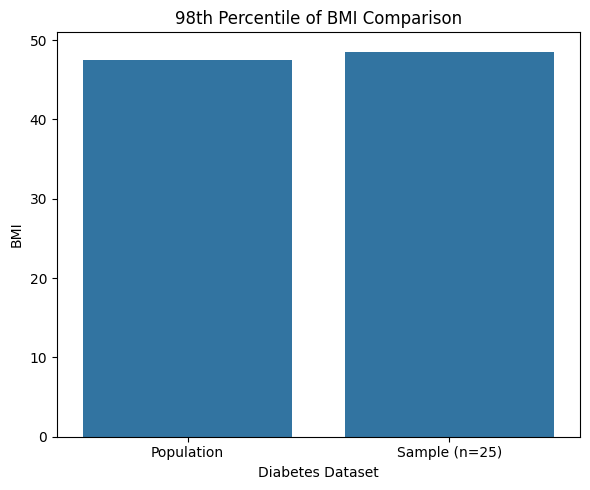

In [11]:
#Bar chart of 98th Percentile BMI
plt.figure(figsize=(6, 5))
sns.barplot(data=bmi_98_df, x='Diabetes Dataset', y='98th Percentile BMI')
plt.title('98th Percentile of BMI Comparison')
plt.ylabel('BMI')
plt.tight_layout()
plt.savefig("bmi_98th_percentile_comparison.png")
plt.show()


The 98th percentile tells us the BMI value that 98% of people fall below. In our small sample of 25, this number was quite different from the population's. That’s not surprising maller samples often miss the highest (or lowest) values.
When you're looking at extreme percentiles like the 98th, having a larger sample really matters. The density plot clearly shows how the sample didn’t fully capture the shape of the overall population.

Task C

In [12]:
# Set seed for reproducibility
np.random.seed(4848)

# Lists to store bootstrap results
mean_values = []
std_values = []
percentile_98_values = []

# Generate 500 bootstrap samples, each of size 150
for _ in range(500):
    bootstrap_sample = df.sample(n=150, replace=True)
    bp_values = bootstrap_sample['BloodPressure']

    mean_values.append(bp_values.mean())
    std_values.append(bp_values.std())
    percentile_98_values.append(np.percentile(bp_values, 98))



In [13]:
# Calculate statistics for the full population
pop_mean = df['BloodPressure'].mean()
pop_std = df['BloodPressure'].std()
pop_98th_percentile = np.percentile(df['BloodPressure'], 98)

# Calculate average values from the bootstrap results
avg_bootstrap_mean = np.mean(mean_values)
avg_bootstrap_std = np.mean(std_values)
avg_bootstrap_98th = np.mean(percentile_98_values)

# Create a summary table for comparison
bp_summary = pd.DataFrame({
    'Statistic': ['Mean', 'Standard Deviation', '98th Percentile'],
    'Population Value': [pop_mean, pop_std, pop_98th_percentile],
    'Bootstrap Estimate': [avg_bootstrap_mean, avg_bootstrap_std, avg_bootstrap_98th]
})

print(bp_summary)


            Statistic  Population Value  Bootstrap Estimate
0                Mean         69.105469           69.176027
1  Standard Deviation         19.355807           19.095448
2     98th Percentile         99.320000           97.879360


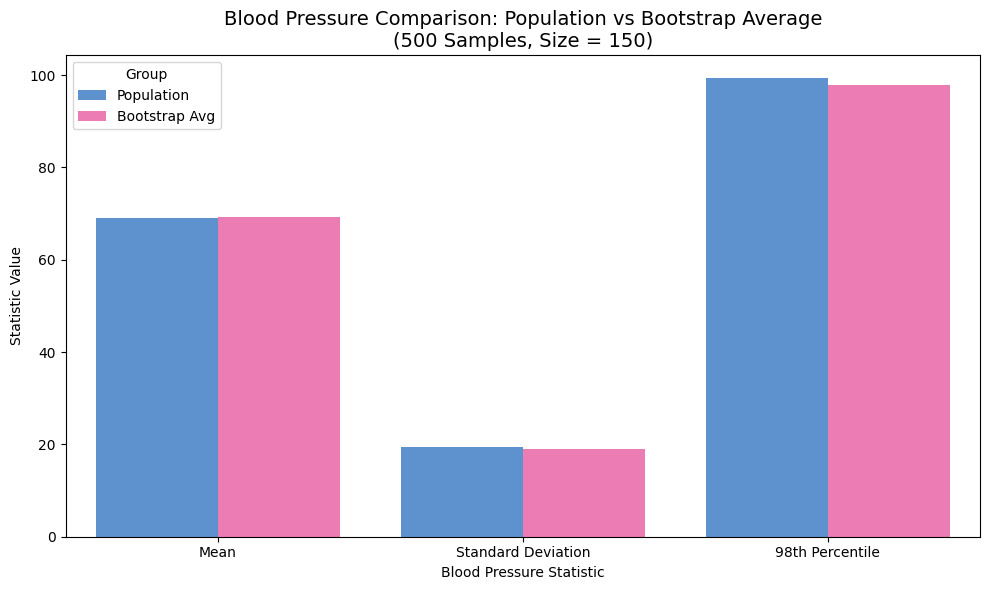

In [14]:
# Rename columns for display
bp_summary_renamed = bp_summary.rename(columns={
    'Population Value': 'Population',
    'Bootstrap Estimate': 'Bootstrap Avg'
})

# Melt the DataFrame for seaborn plotting
bp_melted = bp_summary_renamed.melt(id_vars='Statistic', var_name='Group', value_name='Value')

# Define custom colors: blue for Population, pink for Bootstrap Avg
custom_palette = {'Population': '#4A90E2', 'Bootstrap Avg': '#FF69B4'}

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=bp_melted, x='Statistic', y='Value', hue='Group', palette=custom_palette)

# Add labels and title
plt.title('Blood Pressure Comparison: Population vs Bootstrap Average\n(500 Samples, Size = 150)', fontsize=14)
plt.ylabel('Statistic Value')
plt.xlabel('Blood Pressure Statistic')

# Final layout and save
plt.tight_layout()
plt.savefig("bloodpressure_population_vs_bootstrap_blue_pink.png")
plt.show()



Using 500 bootstrap samples of size 150, we estimated the mean, standard deviation, and 98th percentile for BloodPressure. The results showed that the bootstrap averages were closely aligned with the actual population values, indicating that the method effectively captures key statistical patterns. The histograms of the bootstrap distributions further confirmed this by showing a tight clustering around the population metrics. This highlights the strength of bootstrap as a reliable resampling technique, especially when dealing with complex statistics or when traditional assumptions about the data, like normality, may not hold.
